
# 1. Importing Libraries


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score, accuracy_score)
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# 2. Data Loading

In [6]:
df = pd.read_csv('heart.csv')
print("First five rows of dataset:")
print(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())

First five rows of dataset:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  --


# 3. Handling Missing Values

In [7]:

# Check for missing values
df.isnull().sum()


# Drop rows with any missing values
# df_dropped = df.dropna()
# print(f"Shape after dropping rows with missing values: {df_dropped.shape}")


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64



# Fill missing values

In [8]:
#when dataset is very large and interval or ratio
df.fillna(df.mean(), inplace=True)

#when dataset is ordinal
df.fillna(df.median(), inplace=True)
#when dataset is nominal
df.fillna(df.mode(), inplace=True)


TypeError: Could not convert ['MFMFMMFMMFFMMMFFMFMMFMFMMMMMFMMMMMFMMFFFFFMMMMMMMMMFMFFFMMMMMFMMFFFMMMMMMFMMMFMMMMMMMMMFMMFMFMFMMMMMMMFMMMFMMMFMMMFFMFFMFFMFMMFFFMMMMMFMFMMMMMMMFMMFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMFMMMMFMMMFMMMMMFFMMMFMMMFMMMMMMMFMFMFMMMMMFFMMMMMMFMMFMFMMMMMMMMFMMMMMMMMMMMFFMFFMFMMMMMMMFMFMMFMMMFFMMFFMFMMFMMFMMMMMMMMMMMFMFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMFMMMMMMMFMMMMMMMMMMMMFMMMFMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMFMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMMFMMMMFMMMMMFMMFMMMMFMMMMFFMMMMMMMMFFFFMFMMFMMMMMMMMFMMMMMMMFMMFFFFMFFMMFMFMMMFFMMFMFFMMFFMMMMMMMMMFMMFMMMMMMFFFMFMMMMFMFFMFFMFMFFMMMMFMFMFMMFMMMMFFMFMMMMMMMMMMFMFFFFFMMMFMFMMMFFMFMMMMFMFMMMMMFMFMMMMFMMMMMMFFFFMMMMMMMFMMMMMFMMFFMMMMMMMFMFFFMFMMMMFFMMMMMFFFMMFMMMMMMMFMMMMFMMMMMMFMMFMMMMMFFMFMMFMMMFMMMMFMMFMMFMMMFM'
 'ATANAPATAASYNAPNAPATAATAASYATANAPATAATAASYNAPATAASYATAASYATATAATAATAATANAPNAPASYATAATAATANAPNAPASYASYATAATAASYATAATAASYATANAPATANAPASYNAPASYATANAPASYASYASYATAATAASYATAASYNAPASYASYATANAPASYASYATAATAASYATAASYASYATAATAASYASYASYNAPASYASYATAASYNAPATAASYATAASYASYASYATATAASYATAASYATAASYNAPASYATANAPASYATAASYASYASYASYASYATAASYATAASYATAATAASYASYATANAPASYASYASYTATANAPNAPASYATAATAATAATAASYATANAPNAPASYASYASYASYNAPATAATAASYASYASYASYASYASYATAASYATAATAATAASYATAATAATAASYATAASYASYASYASYATAASYASYATAATAATATAASYATAASYNAPATANAPATANAPASYASYASYATANAPASYASYATAASYASYATANAPATAASYASYASYASYATAATANAPATATAASYATAASYTATANAPNAPATAATAASYATAATAATAASYASYNAPNAPNAPASYTAASYNAPATAATAASYASYNAPNAPATAASYNAPASYATAASYASYNAPATAASYATAATAASYTAASYASYATAASYATAATAASYTANAPASYASYASYASYASYASYATAASYNAPATANAPNAPATAATAATAASYASYNAPATAASYATAASYNAPASYATAASYNAPATANAPNAPASYASYATANAPASYNAPATAASYNAPASYATAATAATANAPATAASYASYTAASYASYASYASYASYASYATAASYASYASYASYASYATAASYASYASYASYASYASYASYATANAPASYASYASYNAPASYASYASYASYASYNAPASYASYASYNAPASYNAPASYASYTANAPASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYTAASYATANAPNAPNAPASYNAPASYNAPASYASYASYASYASYASYASYASYASYASYNAPNAPASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYTAASYASYNAPASYASYASYASYNAPASYASYASYASYNAPASYASYASYNAPASYASYASYASYASYASYNAPNAPASYNAPNAPATAATAASYASYNAPASYASYASYASYASYASYASYASYNAPNAPNAPASYASYASYASYNAPASYASYASYNAPNAPASYASYASYASYASYNAPASYASYASYASYASYASYASYNAPNAPNAPATAASYATAASYASYASYNAPATAASYASYASYASYNAPATANAPTAASYASYATAATAASYTAASYNAPASYTANAPASYASYASYASYASYASYASYASYASYASYASYNAPASYNAPASYASYASYASYNAPTAASYNAPNAPASYNAPASYASYASYASYASYASYNAPASYATANAPASYASYASYASYASYASYASYNAPASYASYASYNAPNAPASYASYATAASYNAPTAASYTAASYNAPNAPTANAPNAPASYNAPNAPASYNAPATAASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYASYNAPASYATAASYNAPASYNAPATAASYASYASYASYASYASYNAPASYASYASYNAPNAPASYNAPASYASYASYASYASYASYTAASYASYATAASYNAPATAASYATAASYNAPASYASYASYASYASYNAPTAASYASYASYASYTATAASYATAASYASYATANAPASYNAPNAPNAPNAPASYNAPASYASYASYASYTANAPASYASYASYNAPATANAPNAPNAPASYATAASYASYATANAPATAATAATAASYNAPASYATANAPASYNAPTATAASYASYATANAPNAPASYASYATANAPASYASYASYNAPNAPATAASYASYASYNAPASYTAATATAATAASYATAASYASYASYASYASYASYASYNAPATANAPASYASYASYASYASYNAPASYASYATAASYATAASYNAPATAATAASYASYTAASYNAPASYASYNAPNAPNAPASYNAPATAASYASYASYASYASYNAPNAPNAPASYATAASYASYASYNAPTAATAASYASYASYNAPNAPNAPNAPNAPASYNAPATAASYATATAASYTAASYATAASYASYASYASYNAPASYTATANAPASYNAPTAASYASYNAPASYNAPNAPASYASYASYNAPNAPASYASYASYNAPASYASYATAASYNAPATAASYNAPTAASYNAPASYASYASYASYTANAPNAPNAPNAPTANAPNAPASYATAATANAPNAPNAPATAASYASYNAPASYASYATANAPASYTATAASYASYASYASYNAPASYASYASYNAPATANAPNAPASYASYNAPASYASYNAPNAPASYASYATAASYNAPNAPATANAPASYNAPASYNAPASYATAATAATANAPATAATAASYASYNAPNAPASYASYTATANAPNAPATAASYASYNAPASYATAASYASYASYATAATAATANAPATAASYASYASYATAASYASYTAASYASYATANAP'
 'NormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalSTNormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalSTNormalNormalNormalNormalNormalNormalSTNormalNormalNormalSTSTNormalNormalSTNormalSTNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalSTSTSTNormalNormalNormalNormalNormalNormalNormalNormalSTNormalSTNormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalSTNormalNormalNormalNormalNormalSTNormalNormalNormalNormalNormalSTNormalNormalNormalNormalNormalSTSTNormalNormalNormalNormalNormalNormalSTNormalNormalSTSTNormalNormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalNormalSTSTSTNormalSTSTNormalNormalNormalSTSTNormalNormalNormalNormalSTNormalNormalNormalNormalNormalNormalSTNormalNormalNormalNormalSTLVHNormalNormalNormalNormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalSTNormalSTNormalNormalNormalSTSTSTNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalSTNormalNormalLVHNormalLVHNormalNormalNormalNormalSTNormalSTNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalSTNormalNormalNormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalSTSTNormalNormalNormalSTNormalNormalNormalLVHNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalNormalLVHNormalNormalNormalNormalSTSTLVHNormalNormalSTNormalNormalNormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalSTNormalSTNormalSTNormalSTNormalNormalNormalSTNormalNormalNormalNormalNormalNormalNormalSTNormalNormalNormalNormalNormalNormalNormalNormalSTNormalNormalNormalNormalSTNormalSTNormalSTNormalLVHLVHSTLVHNormalNormalNormalNormalNormalNormalNormalNormalNormalSTNormalNormalSTSTSTSTLVHNormalNormalNormalNormalNormalNormalSTSTNormalNormalNormalSTNormalNormalNormalNormalNormalNormalNormalSTNormalSTNormalSTSTNormalNormalNormalNormalNormalNormalLVHNormalSTNormalSTLVHNormalNormalNormalNormalSTNormalSTNormalSTSTNormalNormalNormalNormalNormalNormalLVHSTNormalNormalNormalNormalNormalSTSTSTSTLVHSTSTSTNormalSTSTSTNormalLVHSTSTNormalNormalSTSTNormalSTSTNormalSTSTSTSTNormalSTSTSTNormalNormalNormalSTSTNormalNormalSTNormalNormalSTSTSTNormalNormalNormalNormalNormalSTNormalSTNormalNormalNormalSTSTNormalLVHLVHNormalSTLVHNormalSTNormalLVHNormalSTSTSTNormalNormalNormalSTSTNormalNormalNormalNormalNormalSTNormalNormalNormalSTSTNormalSTNormalNormalNormalNormalNormalSTSTSTNormalSTNormalNormalSTSTSTSTLVHNormalSTNormalLVHNormalNormalNormalNormalSTSTSTNormalLVHSTSTNormalLVHSTLVHNormalSTNormalSTSTSTNormalSTNormalLVHNormalNormalSTSTNormalSTSTNormalSTSTNormalSTSTSTNormalSTNormalNormalSTNormalSTLVHSTNormalSTNormalLVHSTLVHNormalLVHLVHSTSTNormalLVHSTNormalSTSTLVHLVHLVHLVHLVHSTLVHNormalSTNormalNormalNormalNormalLVHSTSTSTNormalSTSTSTLVHLVHLVHLVHNormalNormalLVHNormalLVHLVHLVHLVHNormalLVHLVHNormalLVHNormalNormalLVHLVHNormalLVHLVHNormalNormalLVHNormalLVHLVHLVHLVHLVHLVHNormalLVHLVHLVHLVHLVHNormalLVHNormalNormalNormalNormalNormalLVHLVHLVHNormalLVHNormalNormalLVHNormalLVHNormalLVHNormalNormalLVHNormalNormalNormalNormalLVHLVHLVHLVHNormalNormalNormalNormalLVHSTNormalLVHLVHNormalNormalNormalNormalNormalLVHLVHNormalLVHLVHLVHNormalLVHNormalLVHLVHLVHNormalLVHLVHNormalNormalNormalNormalNormalNormalLVHLVHLVHNormalLVHNormalNormalSTNormalLVHNormalNormalNormalLVHLVHNormalLVHNormalLVHNormalLVHLVHNormalNormalLVHNormalNormalNormalLVHNormalLVHLVHLVHNormalLVHNormalNormalLVHLVHNormalLVHLVHNormalNormalLVHLVHLVHNormalNormalLVHNormalLVHNormalNormalLVHLVHNormalNormalNormalNormalLVHNormalNormalLVHLVHLVHLVHLVHLVHLVHLVHLVHNormalNormalNormalNormalNormalNormalLVHLVHLVHLVHNormalLVHNormalLVHNormalNormalNormalNormalLVHNormalLVHLVHNormalNormalLVHNormalLVHLVHNormalLVHNormalNormalLVHNormalNormalLVHLVHNormalLVHLVHLVHLVHNormalLVHNormalNormalLVHNormalLVHNormalNormalNormalLVHLVHLVHLVHNormalLVHNormalNormalLVHLVHLVHLVHNormalLVHLVHLVHLVHLVHNormalLVHNormalLVHLVHNormalLVHLVHNormalNormalNormalNormalNormalNormalNormalNormalLVHLVHNormalNormalNormalNormalLVHNormalLVHLVHNormalLVHNormalNormalLVHLVHNormalLVHNormalNormalNormalSTNormalNormalSTLVHNormalLVHNormalLVHNormalNormalLVHNormalNormalLVHNormalNormalNormalNormalLVHNormal'
 'NNNYNNNNYNNYNYNNNNNNNNNYNNYNNNNNNNNNYNNYNYNNYYNNNNYYNNYNYNNYNNNYNNNNYNYNNNYNNNYNNNNNYYYYNYNNNYNYNNNNYNNYNNNNNNNYYNNYNYNNNNNYNNNNNYNYYYYNNNYYYYYNNNNNNYNNNNNYYNYNYYNNNNYNNNNNNNYYNNNNYNYYNNNYYYNNNNNNNNYNNNNNNYNNNNNYYNYNNNNNNYNNNNNYNNNNNNNYYNYYNYYNYNYYYYNNYNYNNNNNYNYNYNYNYNNNYNNNNYYNNNYNNNNNNNNNNYNYYYNNNNNYNYNNNNNNNNYNNYNNNNNYNYNYYYNNNNNNNNNNNYNNNNNNYYNYYYNNYNYNYYNNNYYYYYYYYYYNYNYYYYYNNYYYNNNYNYYNNYYNNNNYYYYYNYNNYNYNYNYYYNYYYNNYYYYNYYNYNNYNNNYYYYYYYNYYYYYYYNNNYYYNYNYNYNNYYYNYNYYYYNNYYYNYNYYNNYYYNYYYYYYNYYYYNNNYNYNNNYYYNYYYNNYNYYYYNYYYYYYNYNYYYNNNNNNNYYNYYYYYNNYYYYYYYYYYYNYYYYYYYYYNYNYNYNNNYNYYNNYNYYYYYNYYYNNNNNYNNNYYNYYNNNYNNNNYYYYYNNNYNYNNNNNNYYYYNNNNNYNNNNNYNYNNNNNYNYNNYNNNYYNNNYYNNNYYNNNNYYNYNNNNNYNYYNYNNNNNNNNNNYNYNYNNNNNNYNYNYYNNNYNNYYYNYNYNYNYNNNYNYNYNYNNNNNNYNNYYYNYNYNNYNNNYNNNYNNNNYNNNNYNNYNYNYNNNNNYNNYYYNNYYNNNNYNNNYNNYNNYNNNYNNYNNYNNNYNNYNNNNYNNNYNNNNNNYYNNNYNNNNNNNYNNYYNNNNNNYNYNNNYNNNNNYYYNNYNNYNN'
 'UpFlatUpFlatUpUpUpUpFlatUpUpFlatUpFlatUpFlatFlatUpFlatFlatUpFlatUpFlatUpUpFlatUpUpUpFlatUpFlatFlatUpUpFlatUpUpFlatUpFlatUpUpFlatFlatUpUpFlatFlatFlatFlatUpUpFlatUpFlatFlatUpFlatUpUpUpFlatUpUpUpUpFlatUpFlatUpFlatUpFlatUpFlatUpUpFlatUpUpFlatUpFlatFlatFlatFlatFlatFlatUpUpUpFlatUpFlatUpUpUpUpFlatUpFlatFlatFlatUpUpUpUpUpFlatFlatUpUpUpFlatFlatFlatUpFlatFlatUpUpFlatUpUpUpUpUpFlatUpFlatFlatFlatFlatFlatUpUpFlatFlatFlatFlatFlatUpFlatUpUpUpUpFlatUpUpUpUpUpFlatFlatUpFlatUpFlatFlatUpUpUpFlatFlatUpUpUpUpUpUpUpFlatFlatFlatUpUpUpFlatUpFlatFlatUpFlatUpFlatFlatFlatUpUpUpUpUpUpFlatUpFlatFlatUpUpUpUpUpUpUpFlatUpFlatFlatFlatUpUpFlatUpFlatUpUpUpFlatFlatUpUpUpFlatUpFlatUpUpUpUpUpUpUpFlatFlatFlatFlatFlatUpFlatFlatUpFlatUpFlatDownFlatFlatFlatFlatUpUpFlatUpUpUpUpUpUpUpFlatFlatFlatUpFlatUpFlatFlatUpUpFlatUpUpUpFlatFlatFlatUpUpFlatUpUpUpUpUpUpUpUpUpUpUpFlatUpUpFlatUpFlatUpFlatUpUpDownFlatUpFlatDownUpDownUpUpUpUpDownUpFlatUpFlatUpFlatFlatUpDownFlatDownUpUpFlatDownUpUpUpUpUpFlatFlatUpUpDownDownDownFlatFlatFlatFlatFlatFlatFlatFlatFlatUpDownFlatUpFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatUpFlatFlatUpFlatUpFlatDownUpFlatFlatFlatUpFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatUpFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatFlatUpDownUpFlatUpFlatFlatUpFlatUpFlatFlatFlatFlatUpDownFlatDownUpUpFlatFlatUpUpFlatFlatFlatFlatFlatFlatUpFlatFlatDownFlatFlatUpFlatUpFlatFlatFlatUpFlatFlatDownUpDownUpFlatUpUpFlatFlatFlatFlatFlatUpFlatUpDownFlatFlatFlatDownUpDownFlatFlatUpFlatUpFlatFlatFlatFlatFlatFlatFlatDownDownFlatFlatDownFlatFlatUpDownFlatFlatUpDownFlatUpFlatUpFlatUpFlatFlatFlatDownUpFlatDownUpFlatUpUpFlatUpFlatFlatFlatFlatFlatFlatDownFlatFlatDownFlatUpFlatDownFlatDownUpUpFlatDownUpUpFlatUpFlatFlatUpFlatDownFlatFlatDownUpUpFlatFlatFlatFlatFlatFlatDownFlatDownFlatFlatFlatFlatFlatFlatFlatDownFlatFlatUpFlatUpFlatFlatFlatFlatFlatFlatUpUpDownFlatUpFlatFlatUpDownFlatFlatFlatFlatDownUpUpFlatFlatFlatFlatFlatUpFlatUpFlatFlatFlatUpFlatUpUpFlatFlatFlatFlatFlatUpUpFlatUpFlatFlatDownFlatUpFlatFlatFlatUpUpUpFlatUpFlatUpFlatUpUpDownFlatUpUpUpUpUpUpUpUpUpFlatUpUpUpFlatFlatFlatUpUpUpFlatUpFlatUpFlatFlatUpFlatUpUpDownFlatUpUpFlatUpFlatUpUpFlatUpFlatFlatUpFlatUpFlatFlatUpFlatFlatUpUpDownUpFlatUpUpFlatFlatUpFlatFlatUpUpUpFlatFlatUpFlatFlatFlatFlatFlatUpFlatFlatUpUpUpUpFlatUpDownDownDownFlatFlatFlatUpDownUpFlatFlatUpUpFlatUpUpDownUpDownUpFlatUpUpFlatUpFlatUpUpFlatUpFlatUpUpUpFlatUpFlatUpUpDownUpFlatFlatFlatFlatUpFlatUpUpUpDownFlatFlatFlatFlatFlatFlatUpFlatFlatFlatFlatUpDownFlatUpFlatUpUpFlatUpFlatFlatUpDownUpUpUpFlatFlatFlatUpUpUpUpFlatUpFlatFlatUpFlatFlatDownFlatFlatFlatFlatUpUpUpUpFlatUpFlatFlatUpUpUpFlatFlatFlatUpFlatFlatFlatUpUpFlatDownUpFlatUpUpFlatUpFlatDownUpUpUpUpFlatFlatFlatUpUpUpUpUpFlatFlatUpUpUpFlatFlatUpDownUpUpFlatFlatFlatUpUpFlatFlatUpFlatFlatFlatUpFlatFlatUpFlatUpUpDownFlatFlatUpDownFlatUpDownUpFlatUpFlatFlatFlatFlatFlatFlatUp'] to numeric



# 4. Discretization and Binning

### equal-width binning

   Age             Age_bins
0   40  Middle-aged (36-50)
1   49  Middle-aged (36-50)
2   37  Middle-aged (36-50)
3   48  Middle-aged (36-50)
4   54       Senior (51-65)
Age_bins
Senior (51-65)         520
Middle-aged (36-50)    284
Elderly (66+)           82
Young (18-35)           32
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3108\2232215481.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_bins', data=df, palette='Set2', order=bin_labels)


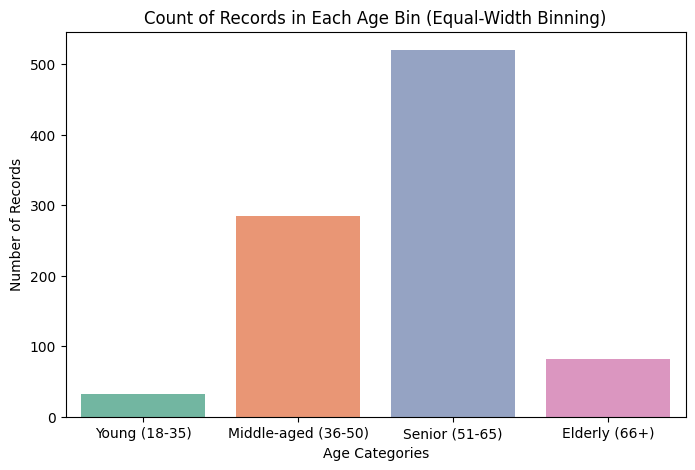

In [9]:
bin_labels = ['Young (18-35)', 'Middle-aged (36-50)', 'Senior (51-65)', 'Elderly (66+)']

df['Age_bins'] = pd.cut(df['Age'], bins=[18, 35, 50, 65, df['Age'].max()], labels=bin_labels, right=True)

print(df[['Age', 'Age_bins']].head())

print(df['Age_bins'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Age_bins', data=df, palette='Set2', order=bin_labels)
plt.title('Count of Records in Each Age Bin (Equal-Width Binning)')
plt.xlabel('Age Categories')
plt.ylabel('Number of Records')
plt.show()


### equal-frequency binning

   Age Age_quantile_bins
0   40               Low
1   49            Medium
2   37               Low
3   48            Medium
4   54            Medium
Age_quantile_bins
Low          239
Medium       232
High         226
Very High    221
Name: count, dtype: int64


C:\Users\DELL\AppData\Local\Temp\ipykernel_3108\541019345.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age_quantile_bins', data=df, palette='Set3', order=bin_labels)


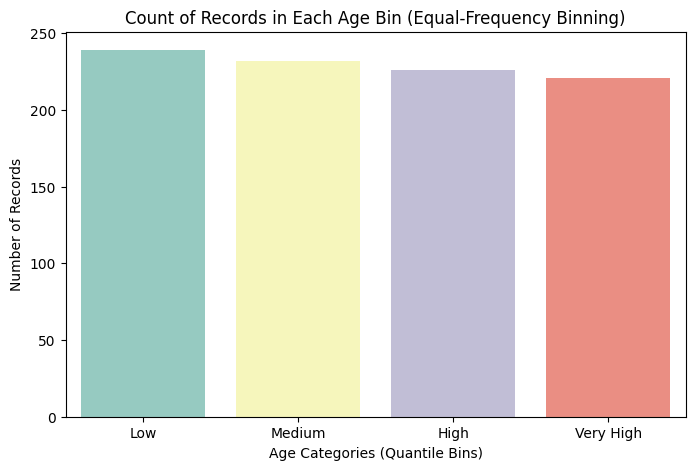

In [10]:
bin_labels = ['Low', 'Medium', 'High', 'Very High']

df['Age_quantile_bins'] = pd.qcut(df['Age'], q=4, labels=bin_labels)

print(df[['Age', 'Age_quantile_bins']].head())

print(df['Age_quantile_bins'].value_counts())

plt.figure(figsize=(8, 5))
sns.countplot(x='Age_quantile_bins', data=df, palette='Set3', order=bin_labels)
plt.title('Count of Records in Each Age Bin (Equal-Frequency Binning)')
plt.xlabel('Age Categories (Quantile Bins)')
plt.ylabel('Number of Records')
plt.show()



# 5. DataFrame Operations

In [11]:
print("\nColumn Names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print(f"\nThe dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

print("\nFirst 5 rows:")
print(df.head())

print("\nLast 5 rows:")
print(df.tail())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing values per column:")
print(df.isnull().sum())

print(df.iloc[0:5, 0:3])

high_bp_df = df[df['RestingBP'] > 130]
print(high_bp_df.head())



Column Names:
['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease', 'Age_bins', 'Age_quantile_bins']

Data types:
Age                     int64
Sex                    object
ChestPainType          object
RestingBP               int64
Cholesterol             int64
FastingBS               int64
RestingECG             object
MaxHR                   int64
ExerciseAngina         object
Oldpeak               float64
ST_Slope               object
HeartDisease            int64
Age_bins             category
Age_quantile_bins    category
dtype: object

The dataset has 918 rows and 14 columns.

First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283    


# 6. Data Output (Saving processed data)

In [12]:
df.to_csv('health_processed.csv', index=False)



# 7. Pandas Plotting in detail

<Figure size 1200x600 with 0 Axes>

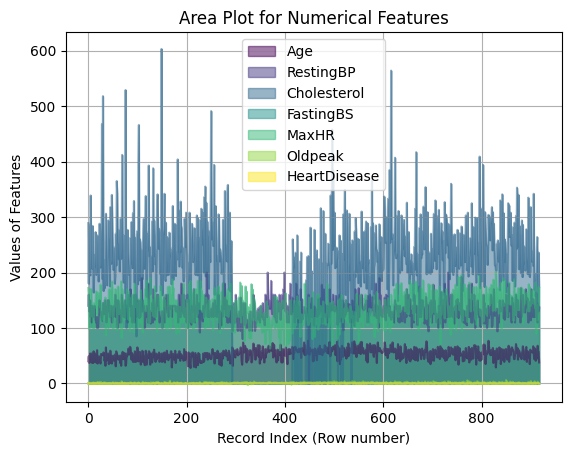

<Figure size 1200x600 with 0 Axes>

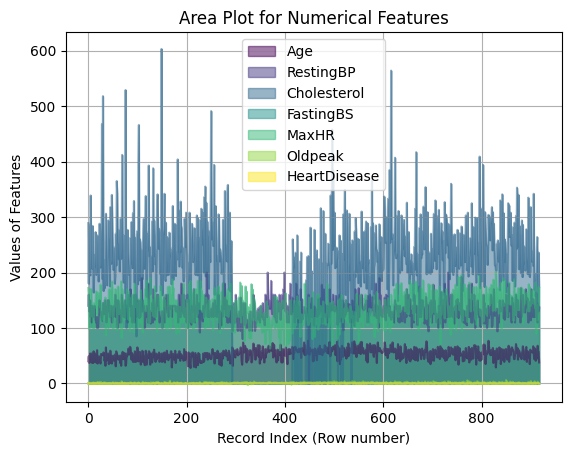

<Figure size 1200x600 with 0 Axes>

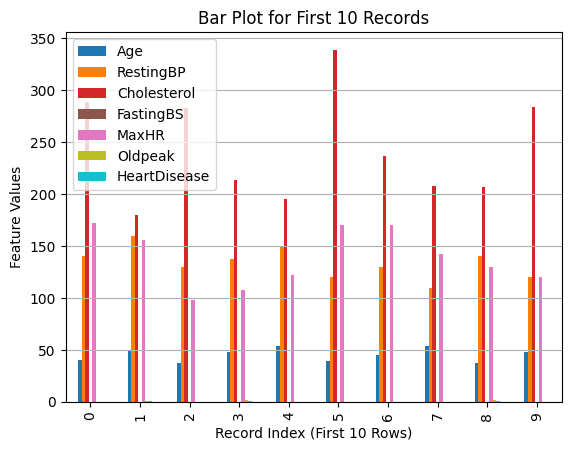

<Figure size 1000x600 with 0 Axes>

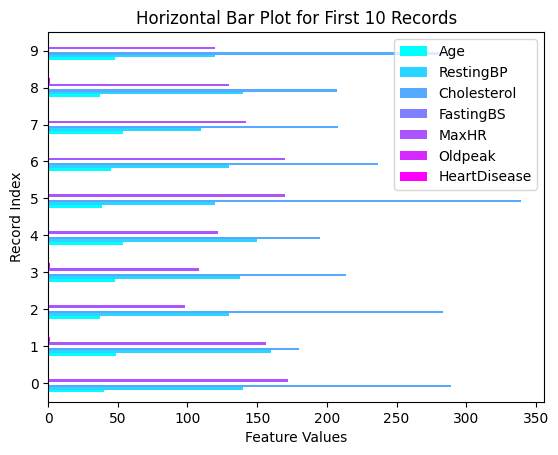

<Figure size 1200x600 with 0 Axes>

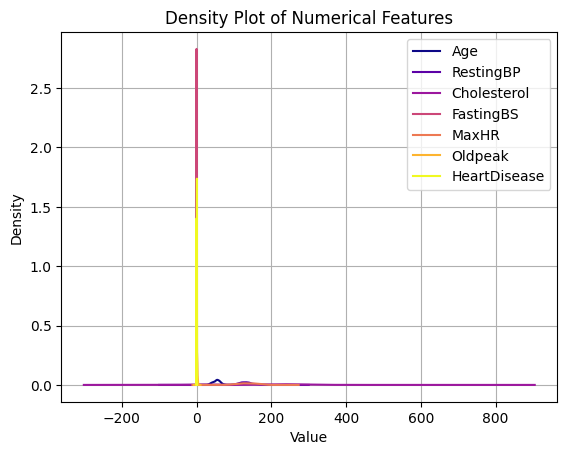

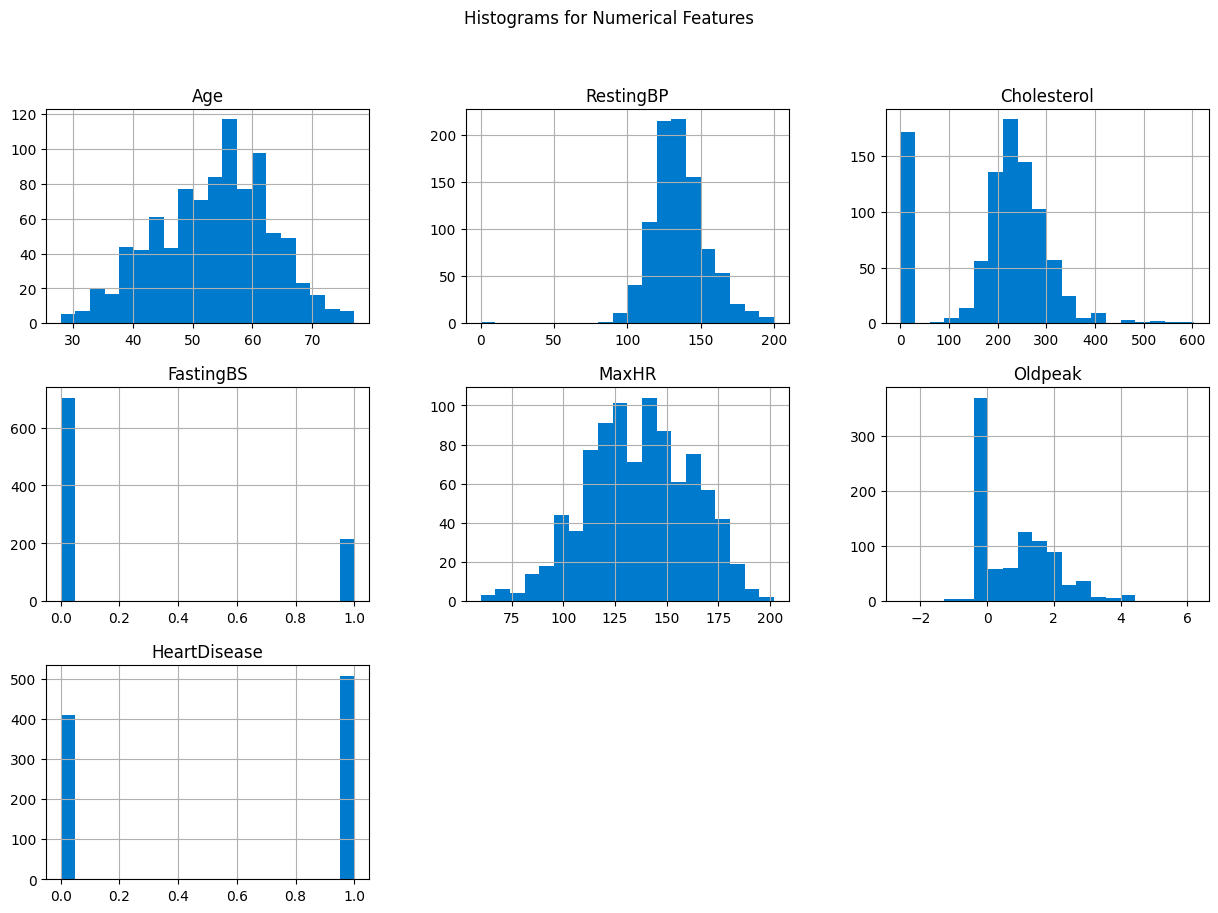

<Figure size 1000x500 with 0 Axes>

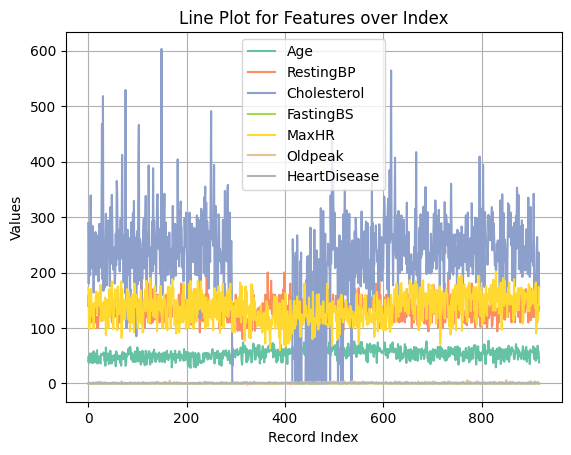

<Figure size 800x500 with 0 Axes>

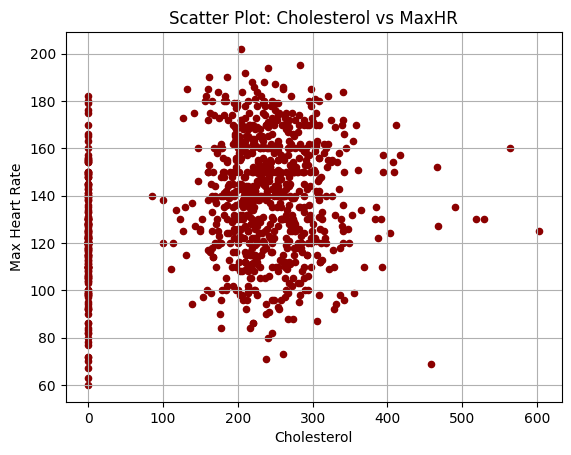

<Figure size 1200x600 with 0 Axes>

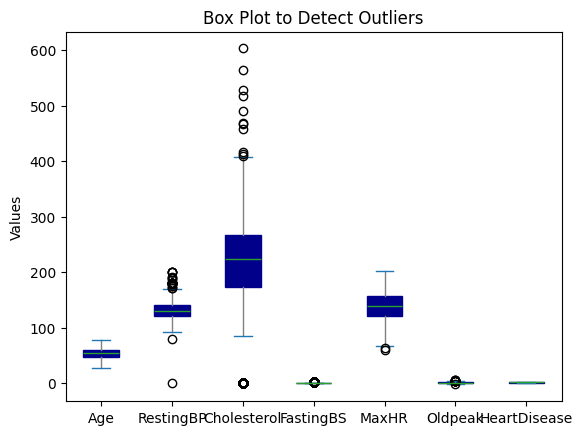

<Figure size 800x600 with 0 Axes>

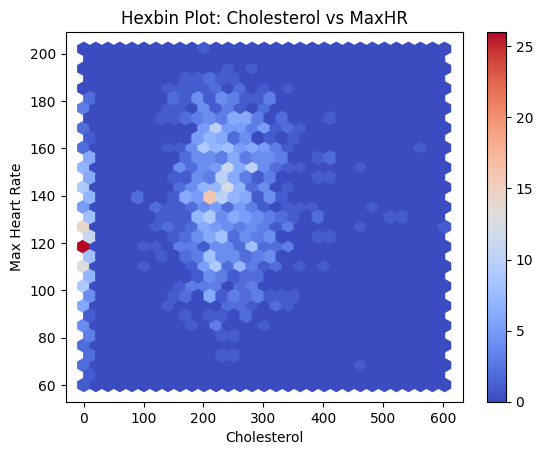

<Figure size 1000x600 with 0 Axes>

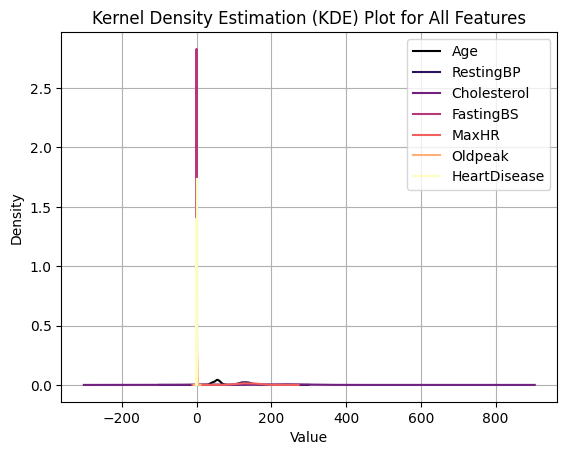

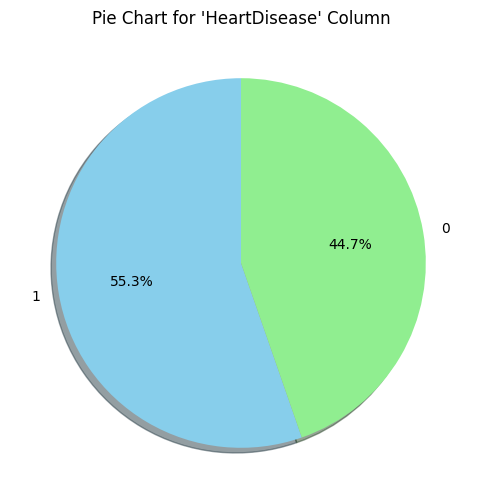

In [15]:
numeric_df = df.select_dtypes(include=['number'])



plt.figure(figsize=(12, 6))
numeric_df.plot.area(alpha=0.5, stacked=False, title="Area Plot for Numerical Features", colormap='viridis')
plt.xlabel("Record Index (Row number)")
plt.ylabel("Values of Features")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
numeric_df.plot.area(alpha=0.5, stacked=False, title="Area Plot for Numerical Features", colormap='viridis')
plt.xlabel("Record Index (Row number)")
plt.ylabel("Values of Features")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
numeric_df.head(10).plot.bar(title="Bar Plot for First 10 Records", colormap='tab10')
plt.xlabel("Record Index (First 10 Rows)")
plt.ylabel("Feature Values")
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
numeric_df.head(10).plot.barh(title="Horizontal Bar Plot for First 10 Records", colormap='cool')
plt.xlabel("Feature Values")
plt.ylabel("Record Index")
plt.show()

plt.figure(figsize=(12, 6))
numeric_df.plot.density(title="Density Plot of Numerical Features", colormap='plasma')
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

numeric_df.hist(figsize=(15, 10), bins=20, color='#007acc')
plt.suptitle("Histograms for Numerical Features")
plt.show()

plt.figure(figsize=(10, 5))
numeric_df.plot.line(title="Line Plot for Features over Index", colormap='Set2')
plt.xlabel("Record Index")
plt.ylabel("Values")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
numeric_df.plot.scatter(x='Cholesterol', y='MaxHR', color='darkred', title="Scatter Plot: Cholesterol vs MaxHR")
plt.xlabel("Cholesterol")
plt.ylabel("Max Heart Rate")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
numeric_df.plot.box(title="Box Plot to Detect Outliers", patch_artist=True, color=dict(boxes='DarkBlue', whiskers='Gray'))
plt.ylabel("Values")
plt.show()

plt.figure(figsize=(8, 6))
numeric_df.plot.hexbin(x='Cholesterol', y='MaxHR', gridsize=30, cmap='coolwarm', title="Hexbin Plot: Cholesterol vs MaxHR")
plt.xlabel("Cholesterol")
plt.ylabel("Max Heart Rate")
plt.show()

plt.figure(figsize=(10, 6))
numeric_df.plot.kde(title="Kernel Density Estimation (KDE) Plot for All Features", colormap='magma')
plt.xlabel("Value")
plt.ylabel("Density")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
df['HeartDisease'].value_counts().plot.pie( 
    autopct='%1.1f%%',
    startangle=90,
    shadow=True,
    colors=['skyblue', 'lightgreen']
)
plt.title("Pie Chart for 'HeartDisease' Column")  # Set title separately
plt.ylabel("")  # Remove y-axis label
plt.show()



# 8. Seaborn Matrix Plot: Heatmap

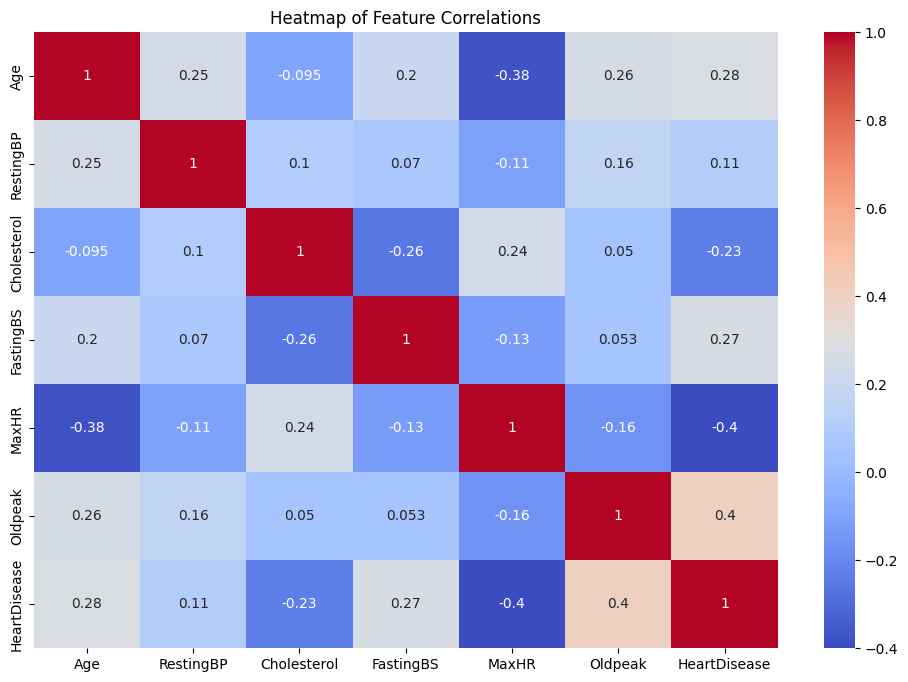

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()


### temporary

In [19]:
# Splitting features and target
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# 9. Classical ML Pipeline (Step by Step)


### Handling Categorical Variables

In [23]:

categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Specify columns for one-hot encoding if needed
columns_for_onehot = ['ChestPainType', 'RestingECG', 'ST_Slope']

# Apply One-Hot Encoding
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(drop='first'), columns_for_onehot)
], remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

print("X train  : ",X_train)
print("X test  : ",X_test)

X train  :  [[0.0 1.0 0.0 ... 'Middle-aged (36-50)' 'Low' 1.9834710743801653]
 [0.0 1.0 0.0 ... 'Middle-aged (36-50)' 'Low' 1.5954198473282444]
 [0.0 0.0 0.0 ... 'Senior (51-65)' 'High' 1.4105960264900663]
 ...
 [0.0 0.0 0.0 ... 'Senior (51-65)' 'High' 1.9312977099236641]
 [0.0 0.0 0.0 ... 'Senior (51-65)' 'High' 0.0]
 [0.0 0.0 0.0 ... 'Middle-aged (36-50)' 'Low' 2.596026490066225]]
X test  :  [[1.0 0.0 0.0 ... 'Senior (51-65)' 'Very High' 1.3829787234042554]
 [0.0 1.0 0.0 ... 'Senior (51-65)' 'Medium' 3.547945205479452]
 [0.0 0.0 0.0 ... 'Senior (51-65)' 'Very High' 0.0]
 ...
 [0.0 0.0 0.0 ... 'Senior (51-65)' 'Very High' 1.7183098591549295]
 [1.0 0.0 0.0 ... 'Middle-aged (36-50)' 'Medium' 2.030534351145038]
 [0.0 0.0 0.0 ... 'Senior (51-65)' 'Very High' 0.0]]



### Feature engineering (example feature)

In [24]:
df['Cholesterol_per_RestingBP'] = df['Cholesterol'] / (df['RestingBP'] + 1)


### Splitting data

In [44]:
# Check column names in your DataFrame
print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'Age_bins', 'Age_quantile_bins',
       'Cholesterol_per_RestingBP'],
      dtype='object')


In [45]:
# Drop the 'Age_bins' and 'Age_quantile_bins' columns
df_filtered = df.drop(['Age_bins', 'Age_quantile_bins'], axis=1)

# Splitting features and target after dropping age bins
X = df_filtered.drop(['HeartDisease'], axis=1)
y = df_filtered['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### Normalization

In [35]:

if len(numerical_cols) > 0:
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
else:
    print("No numerical columns available for scaling.")

    
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

No numerical columns available for scaling.




# 10. Supervised Learning Models


### Multivariate Linear Regression

In [46]:

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lin = linear_model.predict(X_test)
print("R² Score (Linear Regression):", r2_score(y_test, y_pred_lin))

R² Score (Linear Regression): 0.42855062651795806


### visualization

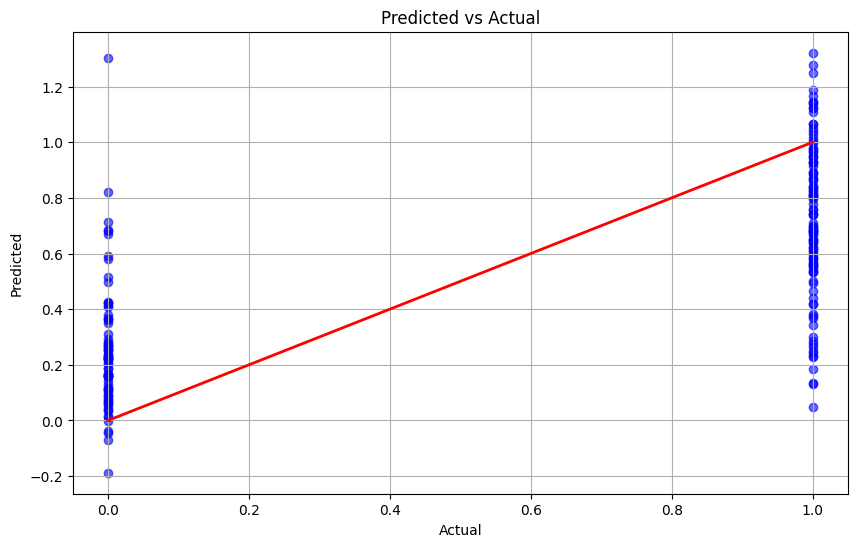

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

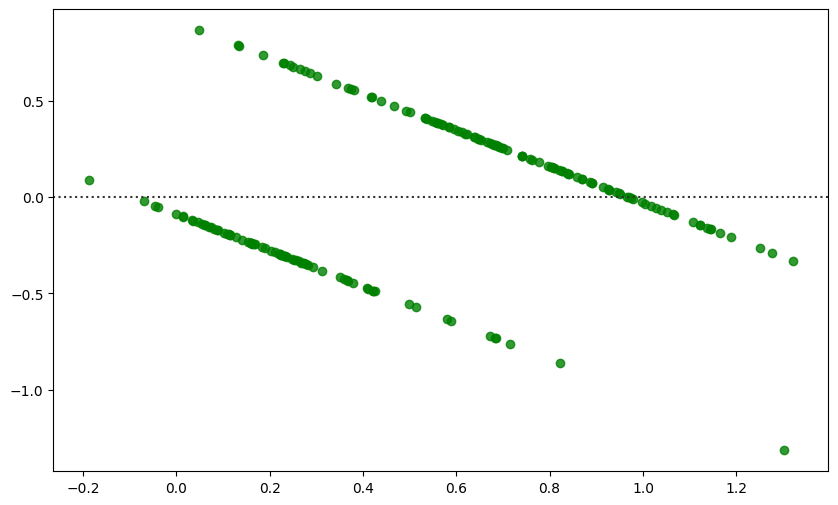

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predicted vs Actual Plot
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lin, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.title("Predicted vs Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# Residual Plot
residuals = y_test - y_pred_lin
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_lin, y=residuals, lowess=True, color='green')
plt.title("Residuals Plot")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Performance Metrics
mae = mean_absolute_error(y_test, y_pred_lin)
mse = mean_squared_error(y_test, y_pred_lin)
rmse = mse**0.5

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")




### Polynomial Regression

In [53]:

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

LinearRegression()

### Visualization

R² Score (Polynomial Regression): 0.5078063855293902
Mean Absolute Error (Polynomial): 0.25476523051443306
Mean Squared Error (Polynomial): 0.11977738627195636
Root Mean Squared Error (Polynomial): 0.346088697116731


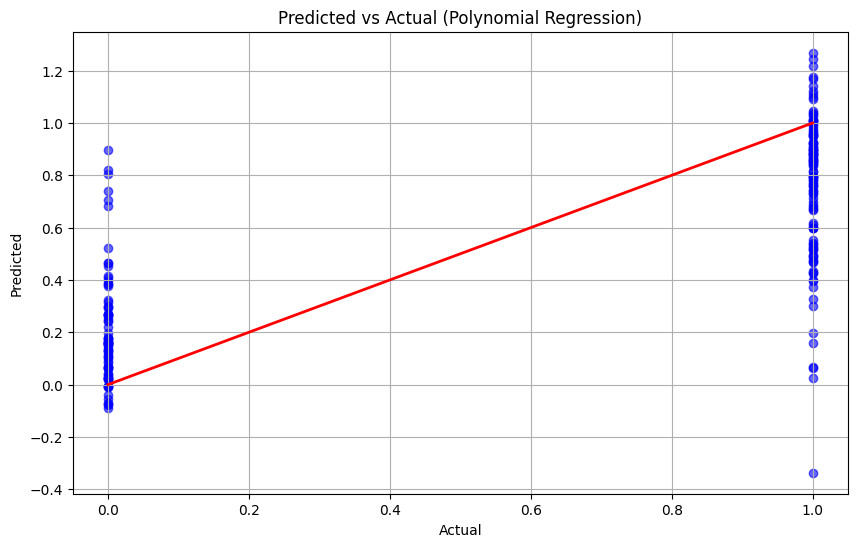

RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

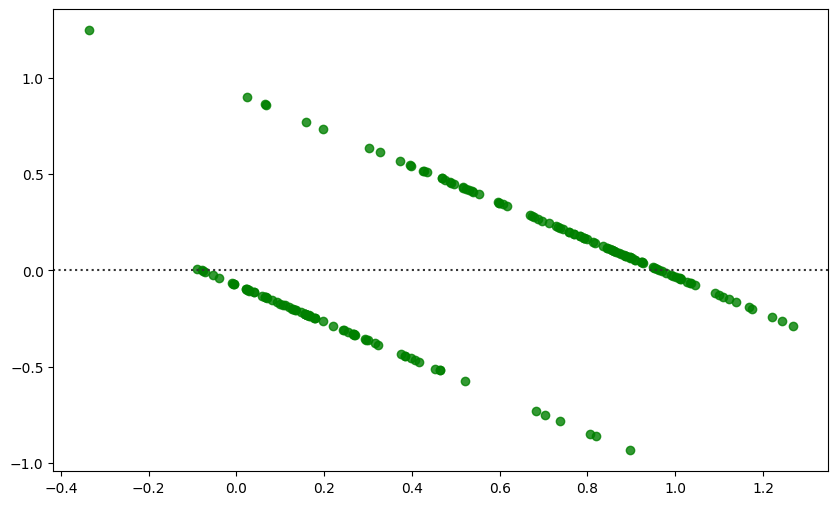

In [54]:
# Transforming the test set using the same polynomial features
X_test_poly = poly.transform(X_test)

# Making predictions with the polynomial model
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluating the polynomial model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# R² Score
print("R² Score (Polynomial Regression):", r2_score(y_test, y_pred_poly))

# Performance Metrics
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = mse_poly**0.5

print(f"Mean Absolute Error (Polynomial): {mae_poly}")
print(f"Mean Squared Error (Polynomial): {mse_poly}")
print(f"Root Mean Squared Error (Polynomial): {rmse_poly}")

# Predicted vs Actual Plot for Polynomial Regression
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_poly, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Perfect prediction line
plt.title("Predicted vs Actual (Polynomial Regression)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()

# Residual Plot for Polynomial Regression
residuals_poly = y_test - y_pred_poly
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_poly, y=residuals_poly, lowess=True, color='green')
plt.title("Residuals Plot (Polynomial Regression)")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()



### Logistic Regression (using classification)

In [51]:

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train.round().astype(int))


LogisticRegression(max_iter=1000)

### visualization

Accuracy (Logistic Regression): 0.842391304347826


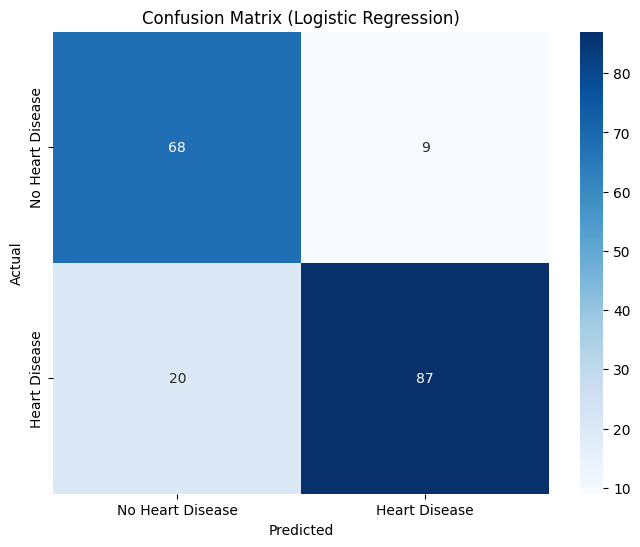

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



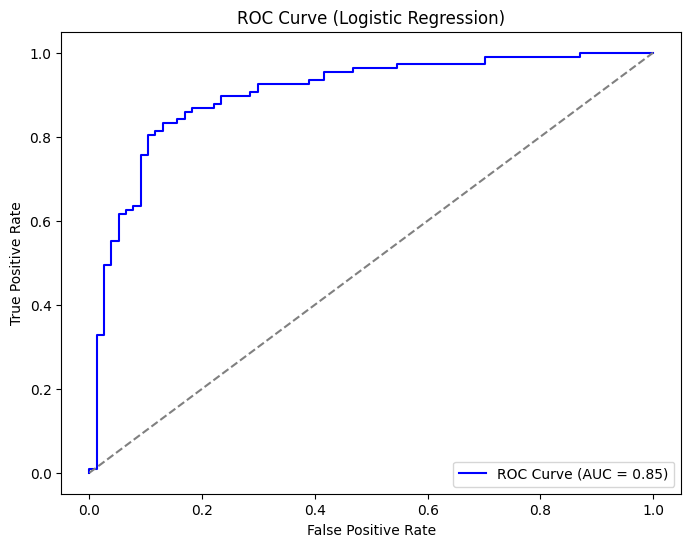

AUC Score (Logistic Regression): 0.8481004976332078


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluating the Logistic Regression model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy (Logistic Regression): {accuracy_log}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_log)
print("Classification Report (Logistic Regression):")
print(class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.title("ROC Curve (Logistic Regression)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"AUC Score (Logistic Regression): {roc_auc}")



# 11. Handling Dataset Imbalance

In [55]:

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train.round().astype(int))


### Visualization

Accuracy (Logistic Regression): 0.8315217391304348


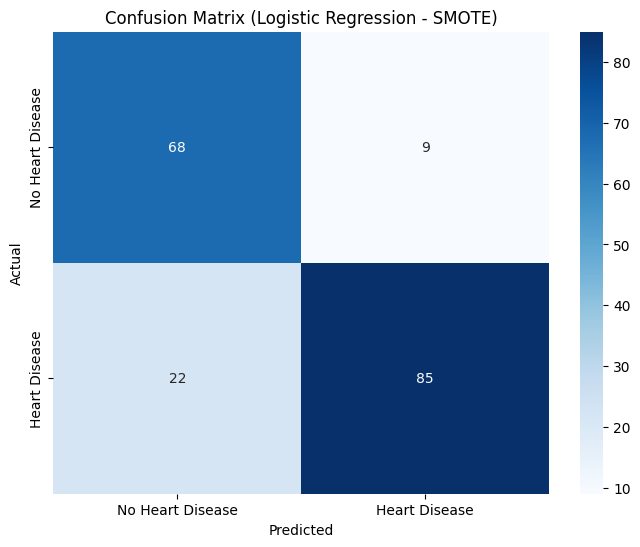

Classification Report (Logistic Regression - SMOTE):
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        77
           1       0.90      0.79      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.83      0.83       184



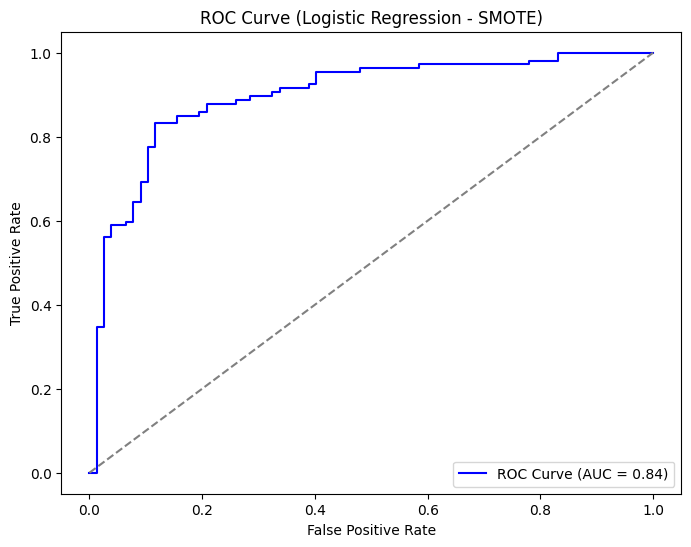

AUC Score (Logistic Regression - SMOTE): 0.8387547032406846


In [56]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train.round().astype(int))

# Train Logistic Regression model on the balanced dataset
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Evaluating the Logistic Regression model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy (Logistic Regression): {accuracy_log}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["No Heart Disease", "Heart Disease"], yticklabels=["No Heart Disease", "Heart Disease"])
plt.title("Confusion Matrix (Logistic Regression - SMOTE)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
class_report = classification_report(y_test, y_pred_log)
print("Classification Report (Logistic Regression - SMOTE):")
print(class_report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guess)
plt.title("ROC Curve (Logistic Regression - SMOTE)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print(f"AUC Score (Logistic Regression - SMOTE): {roc_auc}")




# 12. Support Vector Machine

In [57]:

svm = SVC()
svm.fit(X_train_bal, y_train_bal)

SVC()



# 13. Decision Tree

In [58]:

dt = DecisionTreeClassifier()
dt.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier()



# 14. Random Forest (Bagging)

In [59]:

rf = RandomForestClassifier()
rf.fit(X_train_bal, y_train_bal)


RandomForestClassifier()


# 15. Evaluation and Confusion Matrices

              precision    recall  f1-score   support

           0       0.59      0.75      0.66        77
           1       0.78      0.62      0.69       107

    accuracy                           0.67       184
   macro avg       0.68      0.69      0.67       184
weighted avg       0.70      0.67      0.68       184



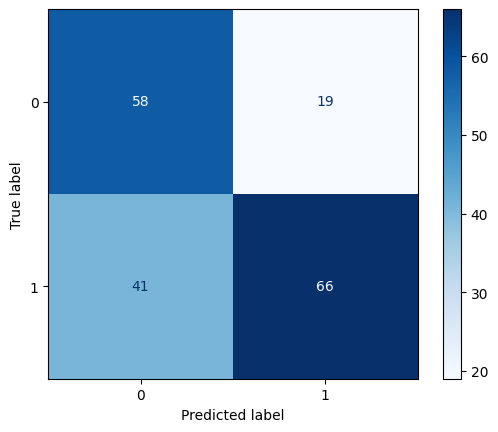

In [62]:


y_pred = svm.predict(X_test)  

print(classification_report(y_test.round().astype(int), y_pred))

cm = confusion_matrix(y_test.round().astype(int), y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')




# 16. Visualizing Actual vs Predicted (Regression Results)

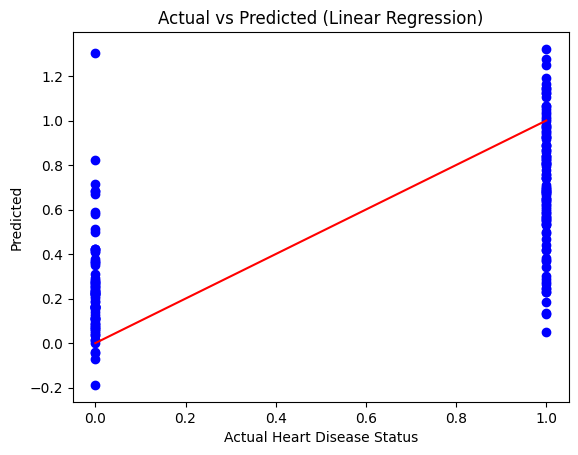

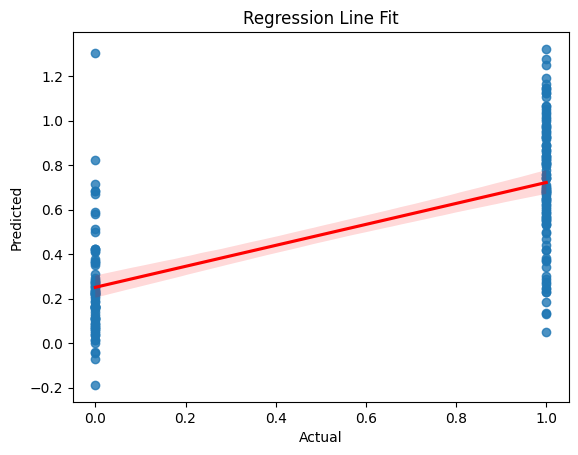

In [63]:
plt.scatter(y_test, y_pred_lin, color='blue')
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Heart Disease Status")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()

sns.regplot(x=y_test, y=y_pred_lin, line_kws={"color": "red"})
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Regression Line Fit")
plt.show()


# Score Calculation 

### For Linear Regression

In [64]:

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.32608695652173914
Root Mean Squared Error (RMSE): 0.5710402407201608
Mean Absolute Error (MAE): 0.32608695652173914
R² Score: -0.33996844277218097


### For Classification

Accuracy: 0.6739130434782609
Precision (Weighted): 0.6967036089798239
Recall (Weighted): 0.6739130434782609
F1 Score (Weighted): 0.6756114130434783
Confusion Matrix:
 [[58 19]
 [41 66]]


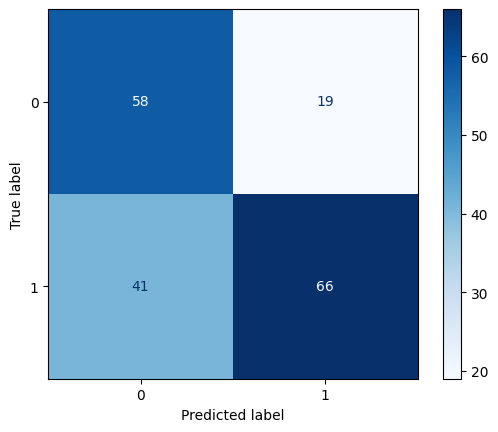

In [67]:

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision (Weighted):", precision)

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall (Weighted):", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.show()